In [5]:
# Import Statements
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class Bat:
    def __init__(self, energy=100, metabolism=4, hunger_threshold=80, hunting_threshold=10, aggression_threshold=40):
        self.energy = energy
        self.metabolism = metabolism
        self.hunger_threshold = hunger_threshold
        self.hunting_threshold = hunting_threshold
        self.aggression_threshold = aggression_threshold
        self.position = np.random.rand(2)  # Random initial position in 2D space

    def is_hungry(self):
        return self.energy < self.hunger_threshold

    def can_hunt(self):
        return self.energy >= self.hunting_threshold

    def is_aggressive(self):
        return self.aggression_threshold <= self.energy < self.hunting_threshold


    def update_energy(self, amount):
        self.energy += amount
        self.energy = max(min(self.energy, 100), 0)  # Ensure energy stays within bounds

    def move_towards(self, target_position):
        if self.energy > self.metabolism:
            direction = target_position - self.position
            if np.linalg.norm(direction) != 0:
                direction = direction / np.linalg.norm(direction) * 0.1
                self.position += direction
                self.energy -= self.metabolism
                self.energy = max(self.energy, 0)  # Ensure energy does not go below 0

    def move_randomly(self):
        # if self.energy > self.metabolism:
            self.position += np.random.rand(2) - 0.5
            self.energy -= self.metabolism

class Moth:
    def __init__(self):
        self.position = np.random.rand(2)  # Random initial position in 2D space

    def move(self):
        self.position += np.random.rand(2) - 0.5

    # Moth defense mechanisms
    def absorb_echo(self, distance, artificial_light):
        effectiveness = 0.6 if artificial_light else 0.85
        return np.random.rand() < effectiveness if distance > 5 else False

    def acoustic_jamming(self, distance, artificial_light):
        effectiveness = 0.5 if artificial_light else 0.75
        return np.random.rand() < effectiveness if 1 < distance <= 5 else False

    def evasive_maneuver(self, distance):
        return np.random.rand() < 0.7 if distance <= 1 else False


class Ecosystem:
    def __init__(self, num_bats, num_moths, artificial_light=True):
        self.bats = [Bat() for _ in range(num_bats)]
        self.moths = [Moth() for _ in range(num_moths)]
        self.artificial_light = artificial_light
        self.day = 0

    def distance(self, a, b):
        return np.linalg.norm(a.position - b.position)

    def closest_moth(self, bat):
        if not self.moths:
            return None, None
        distances = [self.distance(bat, moth) for moth in self.moths]
        min_distance_index = np.argmin(distances)
        return self.moths[min_distance_index], distances[min_distance_index]

    def hunt_attempt(self, bat, moth, distance):
        success_rate_modifier = 0.65 if bat.is_aggressive() else 0.6  # Aggressive bats have a higher success rate
        if distance <= 1 and moth.evasive_maneuver(distance):
            return False
        elif 1 < distance <= 5 and moth.acoustic_jamming(distance, self.artificial_light):
            return False
        elif distance > 5 and moth.absorb_echo(distance, self.artificial_light):
            return False
        return np.random.rand() < success_rate_modifier  # Apply success rate modifier here 
    
    def update(self):
        bats_to_remove = []
        for bat in self.bats:
            
            print(f"Before action: Bat energy: {bat.energy}")
            
            if bat.energy <= 0:
                bats_to_remove.append(bat)
                continue
            
            target_moth, distance = self.closest_moth(bat)
            
            if bat.is_hungry() and bat.can_hunt() and target_moth is not None:
                bat.move_towards(target_moth.position)
                
                print(f"After moving towards moth: Bat energy = {bat.energy}")  # Log energy after moving
                
                if bat.energy <= 0:
                    bats_to_remove.append(bat)
                    continue
                
                if self.hunt_attempt(bat, target_moth, distance):
                    energy_gain = 16 if bat.is_aggressive() else 15
                    energy_cost = 5 if bat.is_aggressive() else 0  # Aggressive hunting costs more energy
                    bat.update_energy(energy_gain - energy_cost)  # Adjust energy gain for aggressive bats
                    self.moths.remove(target_moth)
                    
                    print(f"After hunting: Bat energy = {bat.energy}")  # Log energy after hunting
            
            else:
                    bat.move_randomly()
                    print(f"After moving randomly: Bat energy = {bat.energy}")  # Log energy after random move
                
            if bat.energy <= 0:
                bats_to_remove.append(bat)
                
        for bat in bats_to_remove:
            if bat in self.bats:
                self.bats.remove(bat)
                print(f"Bat removed due to low energy")

        for moth in self.moths:
            moth.move()

    def simulate(self, days=45):
        for _ in range(days):
            if len(self.bats) == 0 or len(self.moths) == 0:
                print(f"Extinction occurred on day {self.day}.")
                break
            self.update()
            self.day += 1
            print(f"Day {self.day}: {len(self.bats)} bats, {len(self.moths)} moths.")

            
if __name__ == "__main__":
    # Adjust the numbers and artificial_light as needed for different scenarios
    ecosystem = Ecosystem(num_bats=3, num_moths=20, artificial_light=False)
    ecosystem.simulate()

Before action: Bat energy: 100
After moving randomly: Bat energy = 96
Before action: Bat energy: 100
After moving randomly: Bat energy = 96
Before action: Bat energy: 100
After moving randomly: Bat energy = 96
Day 1: 3 bats, 20 moths.
Before action: Bat energy: 96
After moving randomly: Bat energy = 92
Before action: Bat energy: 96
After moving randomly: Bat energy = 92
Before action: Bat energy: 96
After moving randomly: Bat energy = 92
Day 2: 3 bats, 20 moths.
Before action: Bat energy: 92
After moving randomly: Bat energy = 88
Before action: Bat energy: 92
After moving randomly: Bat energy = 88
Before action: Bat energy: 92
After moving randomly: Bat energy = 88
Day 3: 3 bats, 20 moths.
Before action: Bat energy: 88
After moving randomly: Bat energy = 84
Before action: Bat energy: 88
After moving randomly: Bat energy = 84
Before action: Bat energy: 88
After moving randomly: Bat energy = 84
Day 4: 3 bats, 20 moths.
Before action: Bat energy: 84
After moving randomly: Bat energy = 80


Before action: Bat energy: 100
After moving randomly: Bat energy = 96
Before action: Bat energy: 100
After moving randomly: Bat energy = 96
Before action: Bat energy: 100
After moving randomly: Bat energy = 96
Before action: Bat energy: 100
After moving randomly: Bat energy = 96
Before action: Bat energy: 100
After moving randomly: Bat energy = 96
Before action: Bat energy: 96
After moving randomly: Bat energy = 92
Before action: Bat energy: 96
After moving randomly: Bat energy = 92
Before action: Bat energy: 96
After moving randomly: Bat energy = 92
Before action: Bat energy: 96
After moving randomly: Bat energy = 92
Before action: Bat energy: 96
After moving randomly: Bat energy = 92
Before action: Bat energy: 92
After moving randomly: Bat energy = 88
Before action: Bat energy: 92
After moving randomly: Bat energy = 88
Before action: Bat energy: 92
After moving randomly: Bat energy = 88
Before action: Bat energy: 92
After moving randomly: Bat energy = 88
Before action: Bat energy: 92

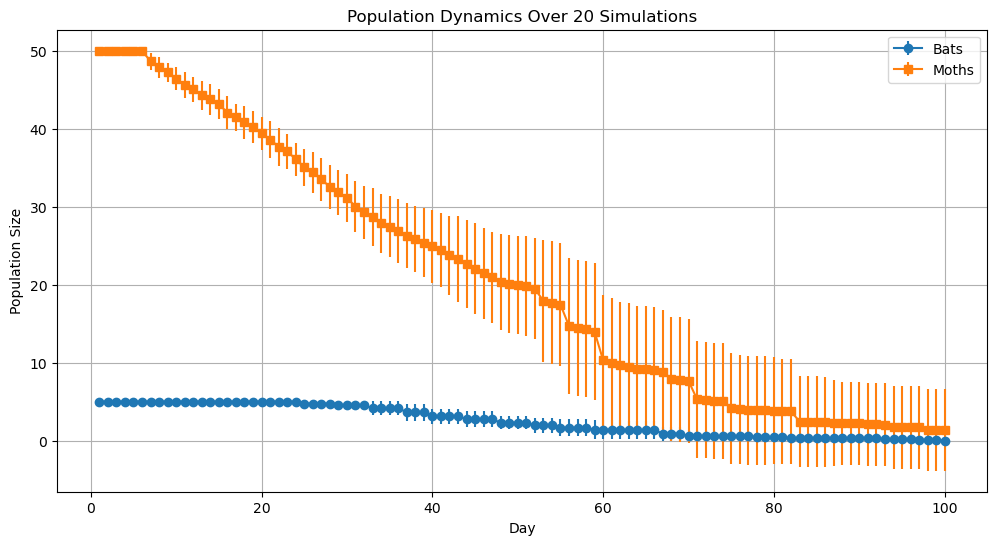

In [7]:
def simulate_ecosystem(days=100, num_bats=5, num_moths=50, artificial_light=False):
    """
    Run the ecosystem simulation and return daily population counts.
    """
    ecosystem = Ecosystem(num_bats=num_bats, num_moths=num_moths, artificial_light=artificial_light)
    population_counts = []
    for day in range(days):
        if len(ecosystem.bats) == 0 or len(ecosystem.moths) == 0:
            break
        ecosystem.update()
        population_counts.append((len(ecosystem.bats), len(ecosystem.moths)))
    return population_counts

# Simulate the ecosystem 20 times
num_runs = 20
days = 100
all_bat_populations = np.zeros((num_runs, days))
all_moth_populations = np.zeros((num_runs, days))

for run in range(num_runs):
    populations = simulate_ecosystem(days=days)
    for day, (bat_count, moth_count) in enumerate(populations):
        all_bat_populations[run, day] = bat_count
        all_moth_populations[run, day] = moth_count

# Calculate mean and standard deviation for populations
mean_bat_populations = np.mean(all_bat_populations, axis=0)
std_bat_populations = np.std(all_bat_populations, axis=0)
mean_moth_populations = np.mean(all_moth_populations, axis=0)
std_moth_populations = np.std(all_moth_populations, axis=0)

# Plotting
days = np.arange(1, days + 1)
plt.figure(figsize=(12, 6))
plt.errorbar(days, mean_bat_populations, yerr=std_bat_populations, label='Bats', fmt='-o')
plt.errorbar(days, mean_moth_populations, yerr=std_moth_populations, label='Moths', fmt='-s')
plt.title('Population Dynamics Over 20 Simulations')
plt.xlabel('Day')
plt.ylabel('Population Size')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Calculate the final mean population sizes for bats and moths
final_mean_bat_population = np.mean(all_bat_populations[:, -1])  # Mean of the last column for bats
final_mean_moth_population = np.mean(all_moth_populations[:, -1]) 
print(final_mean_bat_population)  # Mean of the last column for bats
print(final_mean_moth_population)

0.0
1.4
